# Installation
[full size version download](https://research.zozo.com/data.html)

```bash
$ git clone https://github.com/st-tech/zr-obp.git
$ cd zr-obp
$ python setup.py install

* full size version download 
  (파일 사이즈는 대략 12GB 입니다. 데이터셋 모듈이 샘플데이터를 제공하기 때문에 필요에 따라 받으시면 됩니다.)  
$ wget https://research.zozo.com/data_release/open_bandit_dataset.zip
$ unzip open_bandit_dataset.zip
```

# Open Bandit Pipline 

<p align="center"><img src="https://user-images.githubusercontent.com/43728746/137779971-f3a0fd55-dd15-4e11-b4d7-a8827cb8c281.png" width="75%"></p>

### 1. dataset module 
`from obp.dataset.base import BaseBanditDataset`  
`from obp.dataset.base import BaseRealBanditDataset`      
`from obp.dataset.real import OpenBanditDataset`  
from obp.dataset.multiclass import MultiClassToBanditReduction 
  

from obp.dataset.synthetic import linear_behavior_policy  
from obp.dataset.synthetic import linear_reward_function  
from obp.dataset.synthetic import logistic_reward_function  
from obp.dataset.synthetic import SyntheticBanditDataset  


from obp.dataset.synthetic_continuous import linear_behavior_policy_continuous  
from obp.dataset.synthetic_continuous import linear_reward_funcion_continuous  
from obp.dataset.synthetic_continuous import linear_synthetic_policy_continuous  
from obp.dataset.synthetic_continuous import quadratic_reward_funcion_continuous  
from obp.dataset.synthetic_continuous import sign_synthetic_policy_continuous  
from obp.dataset.synthetic_continuous import SyntheticContinuousBanditDataset  
from obp.dataset.synthetic_continuous import threshold_synthetic_policy_continuous  


from obp.dataset.synthetic_slate import action_interaction_reward_function  
from obp.dataset.synthetic_slate import linear_behavior_policy_logit  
from obp.dataset.synthetic_slate import SyntheticSlateBanditDataset  

### 2. policy module 
#### online bandit algorithm

` from obp.policy.base import BaseContextFreePolicy  `   
from obp.policy.base import BaseContextualPolicy     

   
` from obp.policy.contextfree import EpsilonGreedy`       
` from obp.policy.contextfree import Random  `   
` from obp.policy.contextfree import BernoulliTS  `    

from obp.policy.linear import LinEpsilonGreedy   
from obp.policy.linear import LinTS  
from obp.policy.linear import LinUCB  


from obp.policy.logistic import LogisticEpsilonGreedy  
from obp.policy.logistic import LogisticTS  
from obp.policy.logistic import LogisticUCB  
from obp.policy.logistic import MiniBatchLogisticRegression  


#### off-policy learning methods 
from obp.policy.base import BaseContinuousOfflinePolicyLearner      
from obp.policy.base import BaseOfflinePolicyLearner      
  
from obp.policy.offline import IPWLearner  
from obp.policy.offline import NNPolicyLearner  
from obp.policy.offline_continuous import ContinuousNNPolicyLearner  


### 3. ope (off-policy evaluation) module

from obp.ope.estimators import BaseOffPolicyEstimator  
from obp.ope.estimators import DirectMethod  
from obp.ope.estimators import DoublyRobust  
from obp.ope.estimators import DoublyRobustWithShrinkage  
from obp.ope.estimators import InverseProbabilityWeighting  
from obp.ope.estimators import ReplayMethod  
from obp.ope.estimators import SelfNormalizedDoublyRobust  
from obp.ope.estimators import SelfNormalizedInverseProbabilityWeighting  
from obp.ope.estimators import SwitchDoublyRobust  


from obp.ope.estimators_continuous import KernelizedSelfNormalizedInverseProbabilityWeighting       
from obp.ope.estimators_continuous import BaseContinuousOffPolicyEstimator    
from obp.ope.estimators_continuous import cosine_kernel  
from obp.ope.estimators_continuous import epanechnikov_kernel  
from obp.ope.estimators_continuous import gaussian_kernel  
from obp.ope.estimators_continuous import KernelizedDoublyRobust  
from obp.ope.estimators_continuous import KernelizedInverseProbabilityWeighting  
from obp.ope.estimators_continuous import triangular_kernel  


from obp.ope.estimators_slate import SlateIndependentIPS  
from obp.ope.estimators_slate import SlateRewardInteractionIPS  
from obp.ope.estimators_slate import SlateStandardIPS  

from obp.ope.estimators_tuning import DoublyRobustTuning  
from obp.ope.estimators_tuning import DoublyRobustWithShrinkageTuning  
from obp.ope.estimators_tuning import InverseProbabilityWeightingTuning  
from obp.ope.estimators_tuning import SwitchDoublyRobustTuning  

from obp.ope.meta import OffPolicyEvaluation  
from obp.ope.meta_continuous import ContinuousOffPolicyEvaluation  
from obp.ope.meta_slate import SlateOffPolicyEvaluation  
from obp.ope.regression_model import RegressionModel  

# EDA

In [54]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
import obp
from obp.dataset import OpenBanditDataset
from obp.policy.contextfree import Random
from obp.policy.contextfree import BernoulliTS

import gc 
import yaml
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import beta
from sklearn.utils import check_random_state

## 1. Random policy

In [4]:
# full size version data
path = './open_bandit_dataset/'
dataset_random = OpenBanditDataset(behavior_policy='random', campaign='all', data_path = path)

# sample data 
# dataset_random = OpenBanditDataset(behavior_policy='random', campaign='all')

bandit_feedback_random = dataset_random.obtain_batch_bandit_feedback()

/Users/hyejinlee/Desktop/zr-obp/obp/dataset/real.py:203: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  item_feature_cat = self.item_context.drop("item_feature_0", 1).apply(
/Users/hyejinlee/Desktop/zr-obp/obp/dataset/real.py:206: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  self.action_context = pd.concat([item_feature_cat, item_feature_0], 1).values


### 1-1. Bandit feedback data

In [5]:
bandit_feedback_random.keys()

dict_keys(['n_rounds', 'n_actions', 'action', 'position', 'reward', 'pscore', 'context', 'action_context'])

#### n_rounds, n_actions

In [6]:
print('n_rounds:', bandit_feedback_random['n_rounds'])
print('n_actions:', bandit_feedback_random['n_actions'])

n_rounds: 1374327
n_actions: 80


#### action, position, reward

In [7]:
print('action \n', set(bandit_feedback_random['action']))

action 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}


In [8]:
print('position \n', set(bandit_feedback_random['position']))

position 
 {0, 1, 2}


In [9]:
print('reward \n', Counter(bandit_feedback_random['reward'])) # biased 

reward 
 Counter({0: 1369559, 1: 4768})


In [10]:
for i, (action, position, reward) in enumerate(zip(bandit_feedback_random['action'], bandit_feedback_random['position'], bandit_feedback_random['reward'])):
    print(action, position, reward)
    if i>10:
        break

21 0 0
43 1 0
62 2 0
8 1 0
45 0 0
48 2 0
21 0 0
43 1 0
62 2 0
45 0 0
48 2 0
8 1 0


#### pscore
* the probability of an item being recommended at each position
* propensity score

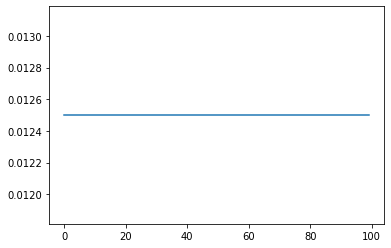

pscore: 0.0125


In [11]:
plt.plot(bandit_feedback_random['pscore'][:100])
plt.show()
print('pscore:', round(1/bandit_feedback_random['n_actions'], 4))

#### context
* user context vector

In [12]:
bandit_feedback_random['context']

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
bandit_feedback_random['context'].shape

(1374327, 26)

In [14]:
# map user index to context 
context_lst = []
for context in bandit_feedback_random['context']:
    context = '_'.join(list(map(lambda x: str(x), context)))
    context_lst.append(context)

context_to_user_idx = {context:user_idx for user_idx, context in enumerate(set(context_lst))}
print('n_users:', len(context_to_user_idx))

n_users: 404


In [15]:
context_to_user_idx

{'0_1_0_0_0_0_0_1_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_1_0_0': 0,
 '0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_1_0_1_0_0_0_0_0_0_0_0': 1,
 '0_1_0_1_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1': 2,
 '0_1_0_1_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_1': 3,
 '0_1_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0': 4,
 '0_0_1_0_0_0_0_1_0_0_0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0': 5,
 '0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_1': 6,
 '0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_0': 7,
 '0_1_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_1_0_0_0': 8,
 '0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1_0_0': 9,
 '0_1_0_0_0_0_0_1_0_0_0_0_0_1_0_0_0_0_0_0_0_0_1_0_0_0': 10,
 '0_1_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_1_0_0_0_0_0_0': 11,
 '0_0_1_1_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0': 12,
 '0_0_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_1_0_0': 13,
 '0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0': 14,
 '0_1_0_0_1_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_1_0_0': 15,
 '0_1_0_0_0_1_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_1_

In [16]:
# add user_idx 
for i, (context, action, position, reward) in enumerate(zip(context_lst, bandit_feedback_random['action'], bandit_feedback_random['position'], bandit_feedback_random['reward'])):
    print(context_to_user_idx[context], action, position, reward) 
    
    if (i+1)%3==0:
        print('----------')
    if i>61:
        break

201 21 0 0
201 43 1 0
201 62 2 0
----------
77 8 1 0
77 45 0 0
77 48 2 0
----------
166 21 0 0
166 43 1 0
166 62 2 0
----------
150 45 0 0
150 48 2 0
150 8 1 0
----------
201 8 1 0
201 45 0 0
201 48 2 0
----------
373 43 1 0
373 1 2 0
373 0 0 0
----------
201 65 1 0
201 55 0 0
201 17 2 0
----------
320 0 0 0
320 43 1 0
320 1 2 0
----------
201 0 0 0
201 43 1 0
201 1 2 0
----------
201 55 0 0
201 65 1 0
201 17 2 0
----------
166 45 0 0
166 8 1 0
166 48 2 0
----------
56 51 0 0
56 29 1 0
56 8 2 0
----------
28 55 0 0
28 65 1 0
28 17 2 0
----------
239 0 0 0
239 1 2 0
239 43 1 0
----------
201 55 0 0
201 17 2 0
201 65 1 0
----------
177 0 0 0
177 43 1 0
177 1 2 0
----------
201 55 0 0
201 65 1 0
201 17 2 0
----------
239 0 0 0
239 1 2 0
239 43 1 0
----------
149 55 0 0
149 65 1 0
149 17 2 0
----------
201 55 0 0
201 65 1 0
201 17 2 0
----------
201 1 2 0
201 0 0 0
201 43 1 0
----------


#### action_context
* action context vector

In [17]:
bandit_feedback_random['action_context']

array([[ 0.00000000e+00,  9.00000000e+00,  6.00000000e+00,
         1.00000000e+00, -4.99171626e-01],
       [ 1.00000000e+00,  1.00000000e+01,  6.00000000e+00,
         1.00000000e+00, -5.43775368e-01],
       [ 2.00000000e+00,  1.00000000e+01,  8.00000000e+00,
         6.00000000e+00,  9.72751855e-01],
       [ 3.00000000e+00,  1.10000000e+01,  1.00000000e+00,
         3.00000000e+00, -5.21473497e-01],
       [ 4.00000000e+00,  3.00000000e+00,  1.90000000e+01,
         6.00000000e+00,  1.90943043e+00],
       [ 5.00000000e+00,  1.10000000e+01,  6.00000000e+00,
         1.00000000e+00, -4.99171626e-01],
       [ 6.00000000e+00,  9.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.48299469e-01],
       [ 7.00000000e+00,  0.00000000e+00,  6.00000000e+00,
         1.00000000e+00, -2.76152917e-01],
       [ 8.00000000e+00,  1.10000000e+01,  1.60000000e+01,
         1.00000000e+00, -6.55284723e-01],
       [ 9.00000000e+00,  9.00000000e+00,  2.00000000e+00,
         2.00000000e+00

In [18]:
bandit_feedback_random['action_context'].shape

(80, 5)

### 1-2. Random policy 
* select_action()  
* update_params()  
* compute_batch_action_dist() 

#### Random(pseudo code) 

In [ ]:
RD = Random()
for t in range(N_trial):
    
    # (1) recommend action(item)
    selected_actions = RD.select_action() # [12, 3, 56]

    # (2) observe reward and update parameter 
    RD.update_params(selected_actions, observed_rewards)
    
    # observed_rewards = [0, 0, 1]
    # action_counts = [0,0, ..., 0]
    # reward_counts = [0,0, ..., 0]
    
    # action_counts[selected_actions] += 1
    # reward_counts[selected_actions] += observed_rewards
    

#### Random(bandit feedback data)

In [19]:
action_counts = np.zeros(dataset_random.n_actions, dtype=int)
reward_counts = np.zeros(dataset_random.n_actions, dtype=int)

In [20]:
for t, (a, r) in enumerate(zip(bandit_feedback_random['action'], bandit_feedback_random['reward'])):

    # (1) recommend action(item)
    action = a
    
    # (2) observe reward
    reward = r 
    
    # (3) update parpameter      
    action_counts[action] += 1
    reward_counts[action] += reward
    

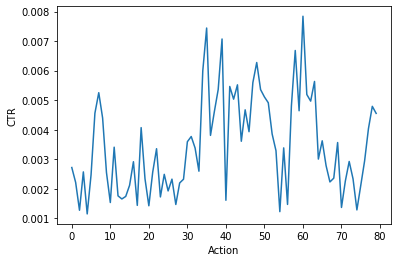

In [21]:
x = [i for i in range(dataset_random.n_actions)]
y = reward_counts/action_counts
plt.plot(x, y)
plt.xlabel('Action')
plt.ylabel('CTR')
plt.show()

#### Distribution over actions
* the true action choie probabilities by MonteCarlo simulations   
  based on the policy parameters(parameters of the beta prior distribution used by Bernoulli-TS)
  
* this is used to calculate importance weight 

In [22]:
# obp code 
policy = Random(
    n_actions=dataset_random.n_actions, 
    len_list=dataset_random.len_list, 
    epsilon=1.,
    random_state=12345,
)
action_dist = policy.compute_batch_action_dist(n_rounds=1)

In [23]:
print(action_dist.shape) # (n_rounds, n_actions, len_list)
print(1/dataset_random.n_actions)

action_dist

(1, 80, 3)
0.0125


array([[[0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.012

In [24]:
# simulation code 
n_rounds = 1 
n_actions = dataset_random.n_actions
len_list = dataset_random.len_list
    
action_dist = np.ones((n_rounds, n_actions, len_list)) * (1 / n_actions)

In [25]:
action_dist

array([[[0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.0125, 0.0125, 0.0125],
        [0.012

In [26]:
del dataset_random
gc.collect()

6377

## 2. Bernoulli-TS 

In [27]:
# full size version data
path = './open_bandit_dataset/'
dataset_bts = OpenBanditDataset(behavior_policy='bts', campaign='all', data_path = path)

# sample data 
# dataset_bts = OpenBanditDataset(behavior_policy='bts', campaign='all')

bandit_feedback_bts = dataset_bts.obtain_batch_bandit_feedback()

/Users/hyejinlee/Desktop/zr-obp/obp/dataset/real.py:203: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  item_feature_cat = self.item_context.drop("item_feature_0", 1).apply(
/Users/hyejinlee/Desktop/zr-obp/obp/dataset/real.py:206: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  self.action_context = pd.concat([item_feature_cat, item_feature_0], 1).values


### 2-1. Bandit feedback data

In [28]:
bandit_feedback_bts.keys()

dict_keys(['n_rounds', 'n_actions', 'action', 'position', 'reward', 'pscore', 'context', 'action_context'])

#### n_rounds, n_actions

In [29]:
print('n_rounds:', bandit_feedback_bts['n_rounds'])
print('n_actions:', bandit_feedback_bts['n_actions'])

n_rounds: 12357200
n_actions: 80


#### action, position, reward

In [30]:
print('action \n', set(bandit_feedback_bts['action']))

action 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}


In [31]:
print('position \n', set(bandit_feedback_bts['position']))

position 
 {0, 1, 2}


In [32]:
print('reward \n', Counter(bandit_feedback_bts['reward'])) # biased 

reward 
 Counter({0: 12295992, 1: 61208})


In [33]:
for i, (action, position, reward) in enumerate(zip(bandit_feedback_bts['action'], bandit_feedback_bts['position'], bandit_feedback_bts['reward'])):
    print(action, position, reward)
    if i>10:
        break

18 1 0
61 0 0
51 2 0
52 0 0
35 1 0
63 2 0
59 0 0
22 1 0
30 2 0
28 0 0
61 1 0
63 2 0


#### pscore
* the probability of an item being recommended at each position  
* propensity score  

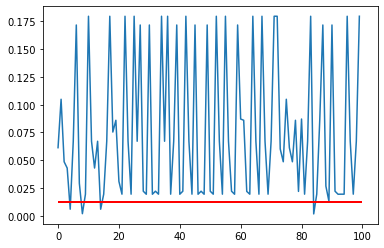

In [34]:
plt.plot(bandit_feedback_bts['pscore'][:100])
plt.hlines(y=1/bandit_feedback_bts['n_actions'], xmin=0, xmax=100, color='red', lw=2) # uniform random policy 
plt.show()

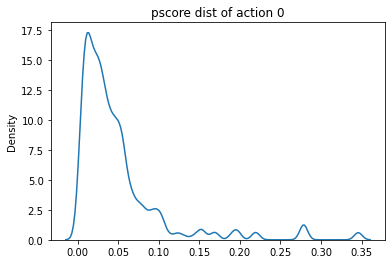

In [35]:
# pscore distribution of action 0
action0_pscore_lst = [[a, p] for a, p in zip(bandit_feedback_bts['action'], bandit_feedback_bts['pscore']) if a==0]
action0_pscore_lst = sorted(action0_pscore_lst, key=lambda x: (x[0], x[1]))
pscore_lst = [ap[1] for ap in action0_pscore_lst]

sns.kdeplot(pscore_lst)
plt.title('pscore dist of action 0')
plt.show()

#### context
* user context vector

In [36]:
bandit_feedback_bts['context']

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]], dtype=uint8)

In [37]:
bandit_feedback_bts['context'].shape

(12357200, 27)

In [38]:
# map user index to context 
context_lst = []
for context in bandit_feedback_bts['context']:
    context = '_'.join(list(map(lambda x: str(x), context)))
    context_lst.append(context)

context_to_user_idx = {context:user_idx for user_idx, context in enumerate(set(context_lst))}
print('n_users:', len(context_to_user_idx))

n_users: 474


In [39]:
context_to_user_idx

{'1_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_1_0_1_0_0_0_0_0_0_0_0': 0,
 '0_0_1_1_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_1_0_0_0_0': 1,
 '0_0_1_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_1_0_0_0_0_0': 2,
 '1_0_0_0_0_0_0_1_1_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0': 3,
 '1_0_0_0_0_0_0_1_1_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0': 4,
 '1_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_1_0_0_0_0_1_0_0_0_0_0': 5,
 '0_0_1_1_0_0_0_0_0_0_1_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0': 6,
 '0_0_1_0_0_0_0_1_1_0_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0': 7,
 '1_0_0_1_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_1_0_0_0_0': 8,
 '0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_1_0_0_0': 9,
 '0_0_1_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_1_0_0_0_0_0_0_0_0': 10,
 '0_0_1_0_0_0_0_1_0_0_1_0_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0': 11,
 '0_0_1_0_0_0_0_1_0_0_0_0_0_0_0_0_1_0_0_0_1_0_0_0_0_0_0': 12,
 '0_0_0_0_1_0_0_0_0_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_0_0': 13,
 '1_0_0_0_0_1_0_0_0_0_0_0_0_1_0_0_0_0_0_0_0_0_1_0_0_0_0': 14,
 '0_0_0_0_0_0_0_1_1_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_0_1_0': 15,
 '0_0_1_0_0_0_0_1_

In [40]:
for i, (context, action, position, reward) in enumerate(zip(context_lst, bandit_feedback_bts['action'], bandit_feedback_bts['position'], bandit_feedback_bts['reward'])):
    print(context_to_user_idx[context], action, position, reward) # add user_idx 
    
    if (i+1)%3==0:
        print('----------')
    if i>61:
        break

57 18 1 0
57 61 0 0
57 51 2 0
----------
57 52 0 0
57 35 1 0
57 63 2 0
----------
57 59 0 0
57 22 1 0
57 30 2 0
----------
317 28 0 0
317 61 1 0
317 63 2 0
----------
351 52 0 0
351 63 2 0
351 35 1 0
----------
57 28 0 0
57 63 2 0
57 61 1 0
----------
57 60 0 0
57 18 2 0
57 52 1 0
----------
57 28 0 0
57 61 1 0
57 63 2 0
----------
317 28 0 0
317 61 1 0
317 63 2 0
----------
57 59 0 0
57 22 2 0
57 65 1 0
----------
57 59 0 0
57 65 1 0
57 22 2 0
----------
317 28 0 0
317 61 1 0
317 63 2 0
----------
207 61 1 0
207 28 0 0
207 63 2 0
----------
57 59 0 0
57 65 1 0
57 22 2 0
----------
57 61 1 0
57 63 2 0
57 28 0 0
----------
57 59 0 0
57 65 1 0
57 22 2 0
----------
57 65 1 0
57 59 0 0
57 22 2 0
----------
57 28 0 0
57 61 1 0
57 63 2 0
----------
57 28 0 0
57 61 1 0
57 63 2 0
----------
225 22 2 0
225 65 1 0
225 59 0 0
----------
76 79 1 0
76 18 2 0
76 43 0 0
----------


#### action_context
* action context vector

In [41]:
bandit_feedback_bts['action_context']

array([[ 0.00000000e+00,  5.00000000e+00,  2.00000000e+00,
         3.00000000e+00, -4.99171626e-01],
       [ 1.00000000e+00,  7.00000000e+00,  2.00000000e+00,
         3.00000000e+00, -5.43775368e-01],
       [ 2.00000000e+00,  7.00000000e+00,  8.00000000e+00,
         5.00000000e+00,  9.72751855e-01],
       [ 3.00000000e+00,  1.10000000e+01,  1.50000000e+01,
         2.00000000e+00, -5.21473497e-01],
       [ 4.00000000e+00,  1.00000000e+00,  2.00000000e+01,
         5.00000000e+00,  1.90943043e+00],
       [ 5.00000000e+00,  1.10000000e+01,  2.00000000e+00,
         3.00000000e+00, -4.99171626e-01],
       [ 6.00000000e+00,  5.00000000e+00,  1.00000000e+01,
         6.00000000e+00,  3.48299469e-01],
       [ 7.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         3.00000000e+00, -2.76152917e-01],
       [ 8.00000000e+00,  1.10000000e+01,  1.40000000e+01,
         3.00000000e+00, -6.55284723e-01],
       [ 9.00000000e+00,  5.00000000e+00,  1.00000000e+00,
         4.00000000e+00

In [42]:
bandit_feedback_bts['action_context'].shape

(80, 5)

### 2-2. Bernoulli-TS algorithm
* select_action()  
* update_params()  
* compute_batch_action_dist() 

####  Parameter setting of beta prior distribution 

In [43]:
path = './obp/policy/conf/prior_bts.yaml'
with open(path, "rb") as f:
    production_prior_for_bts = yaml.safe_load(f)
    
alpha_ = np.array(production_prior_for_bts['all']['alpha'])
beta_ = np.array(production_prior_for_bts['all']['beta'])

#### Bernoulli-TS(pseudo code) 

In [ ]:
TS = BernoulliTS()
for t in range(N_trial):
    
    # (1) recommend action(item)
    selected_actions = TS.select_action() # [12, 3, 56]
    
    # predicted_rewards = Beta(alpha_, beta_)                   # [0.001, 0.01, 0.002, ..., 0.004]
    # selected_actions = predicted_rewards.argsort()[::-1][:3]  # [12, 3, 56] 
    
    # (2) observe reward and update parameter 
    TS.update_params(selected_actions, observed_rewards)
    
    # observed_rewards = [0, 0, 1]
    # alpha_[selected_actions] += observed_rewards
    # beta_[selected_actions] += 1 - observed_rewards


#### Bernoulli-TS(bandit feedback data)

In [44]:
Alpha = np.copy(alpha_)
Beta = np.copy(beta_)

In [45]:
for t, (a, r) in enumerate(zip(bandit_feedback_bts['action'], bandit_feedback_bts['reward'])):

    # (1) recommend action(item)
    action = a
    
    # (2) observe reward
    reward = r 
    
    # (3) update parpameter      
    Alpha[action] += reward
    Beta[action] += 1 - reward
    

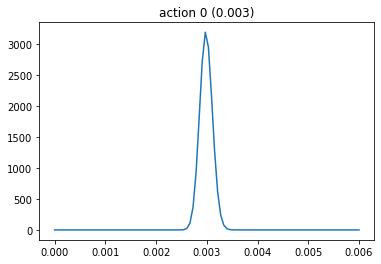

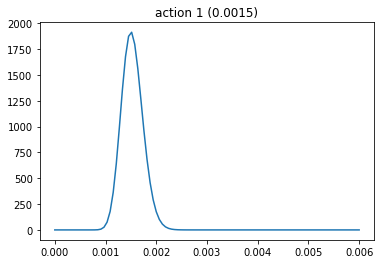

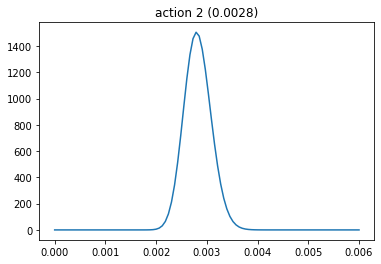

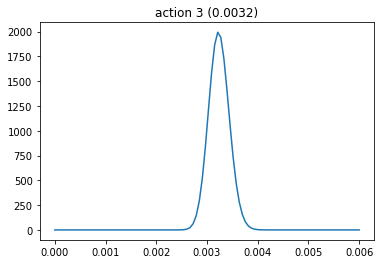

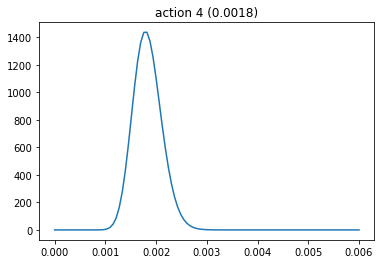

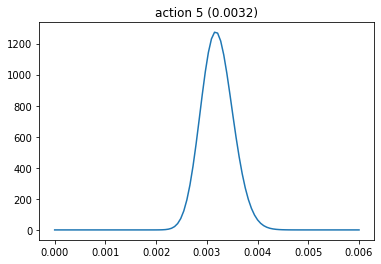

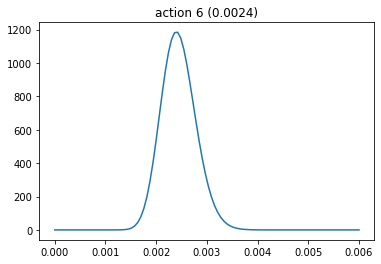

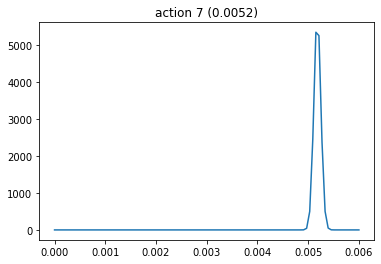

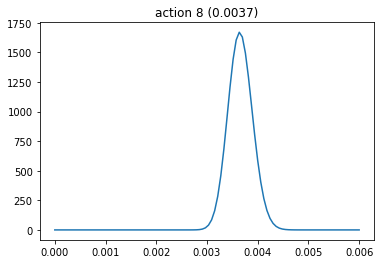

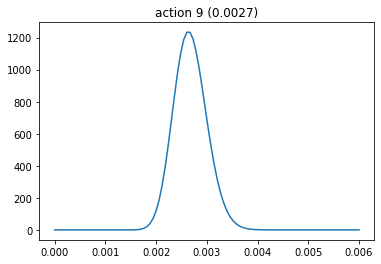

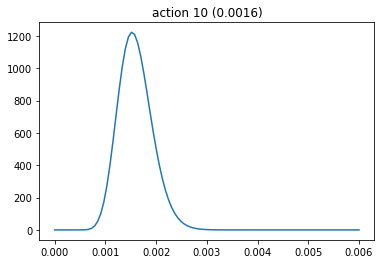

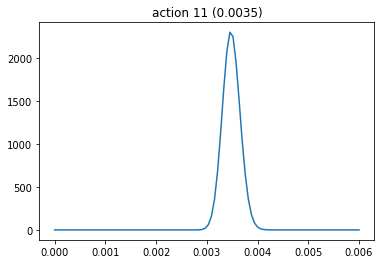

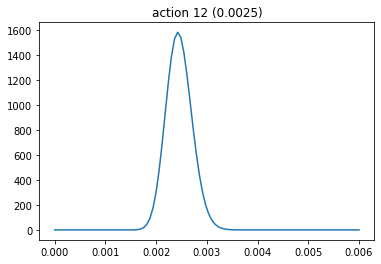

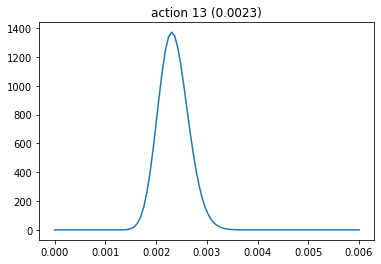

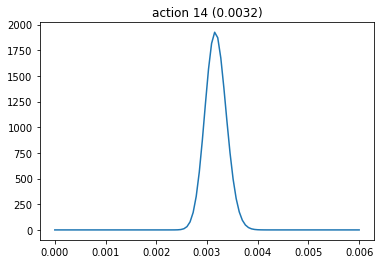

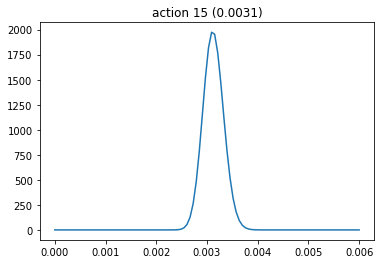

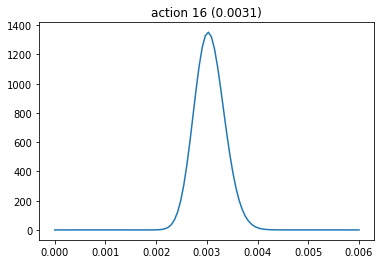

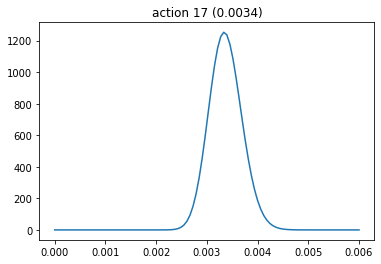

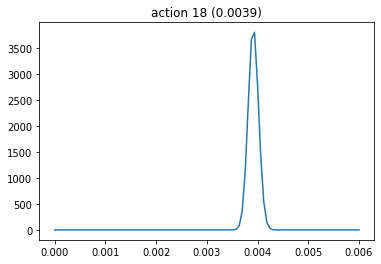

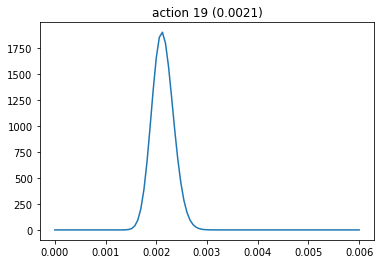

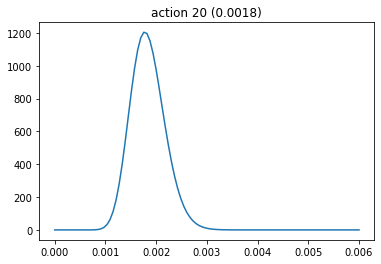

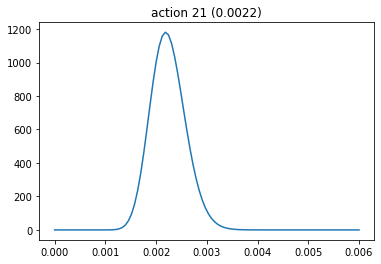

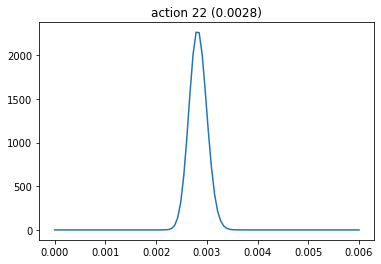

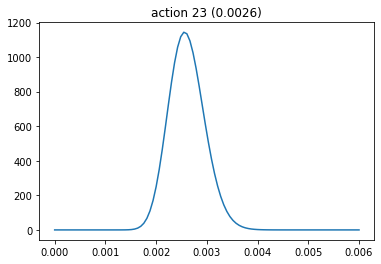

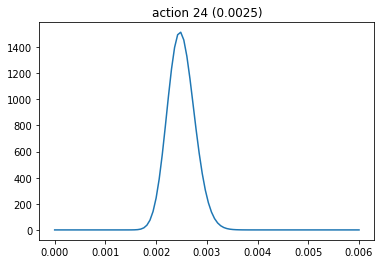

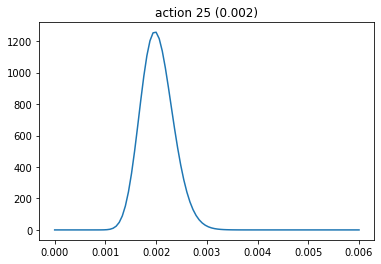

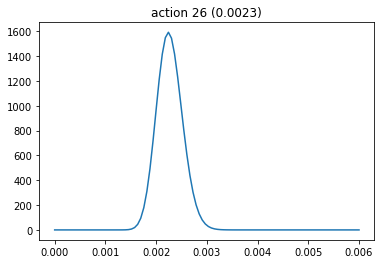

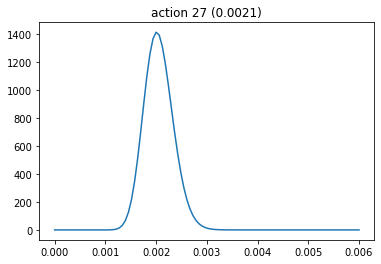

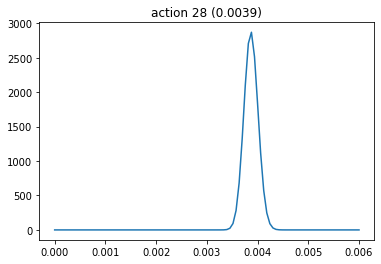

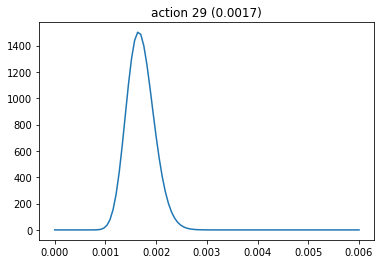

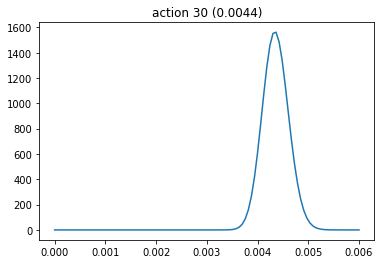

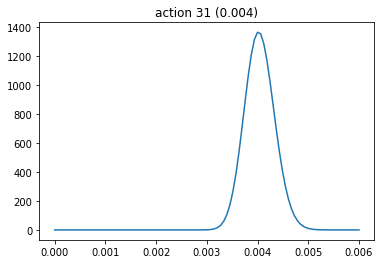

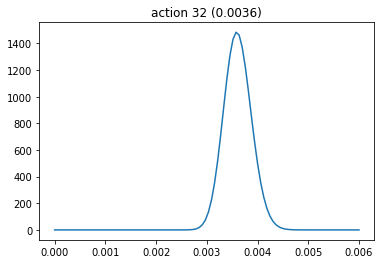

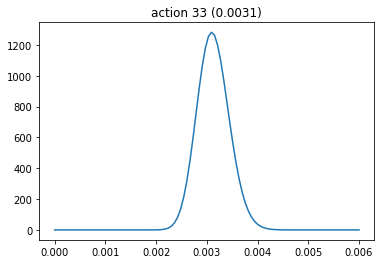

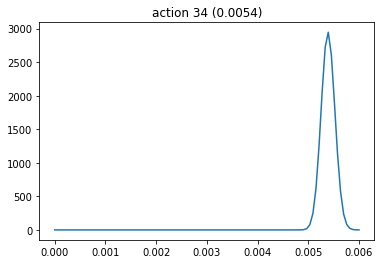

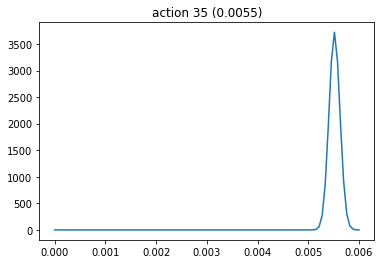

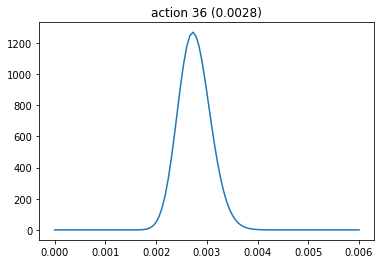

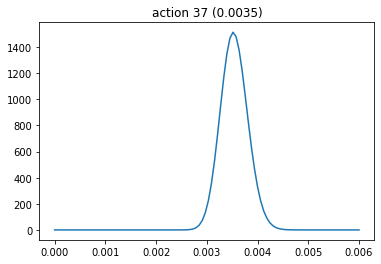

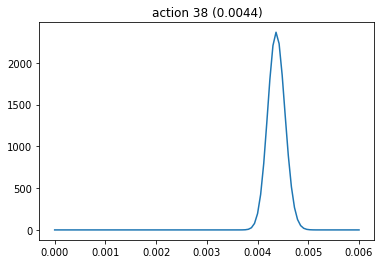

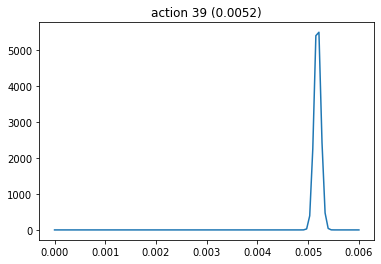

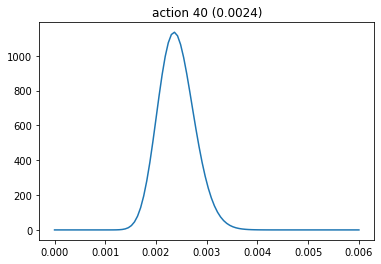

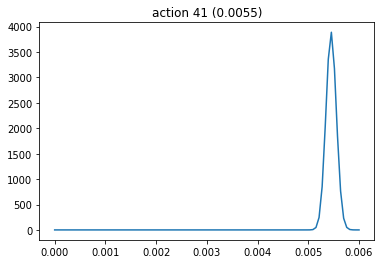

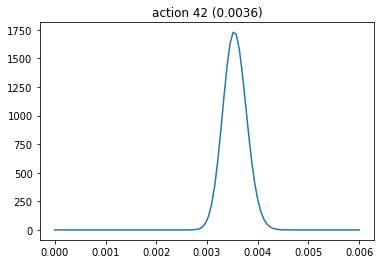

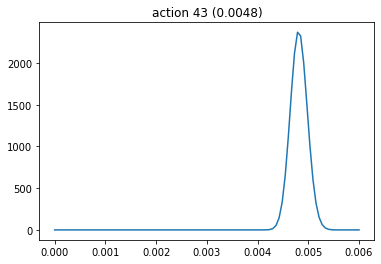

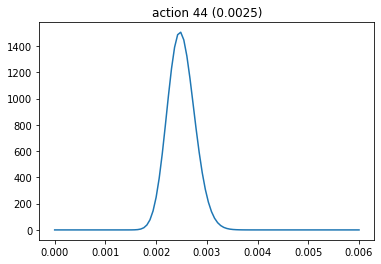

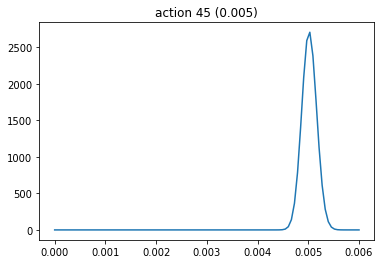

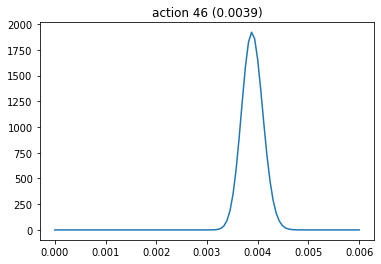

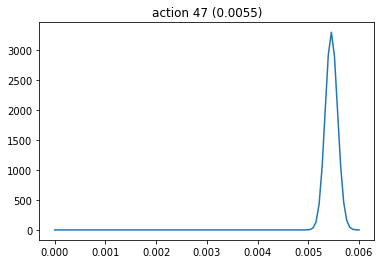

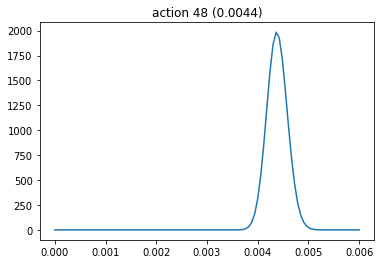

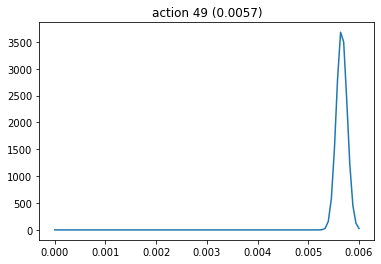

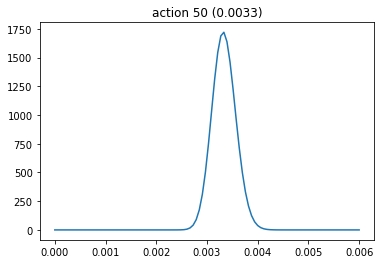

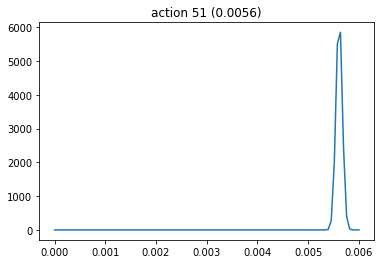

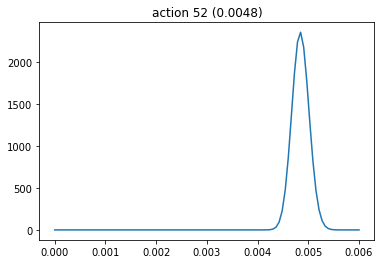

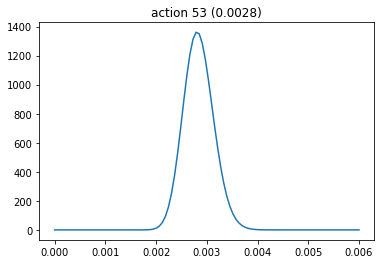

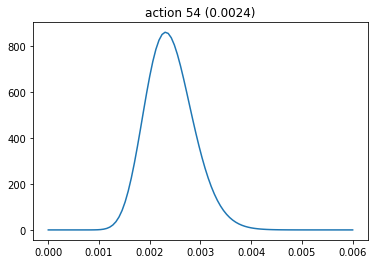

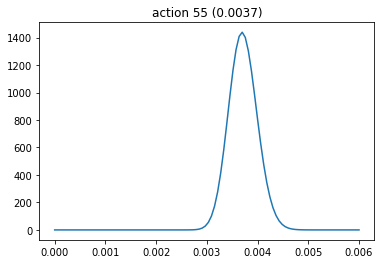

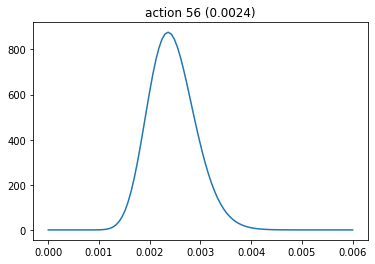

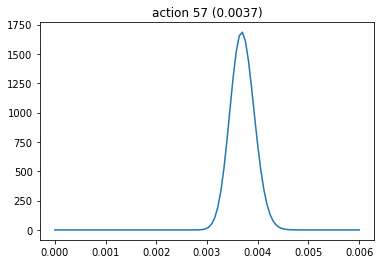

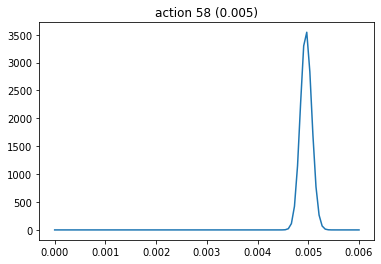

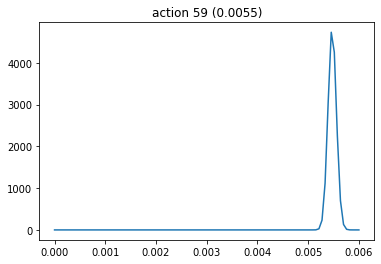

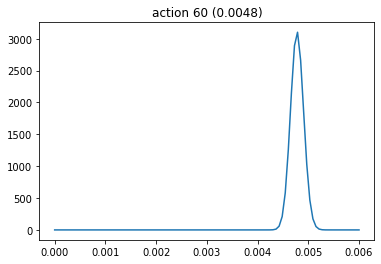

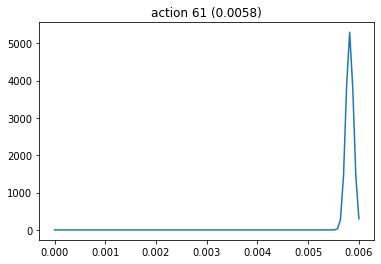

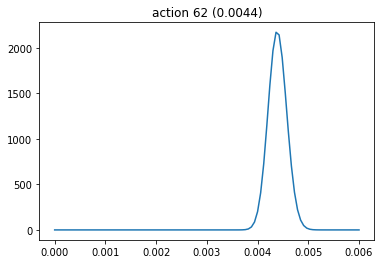

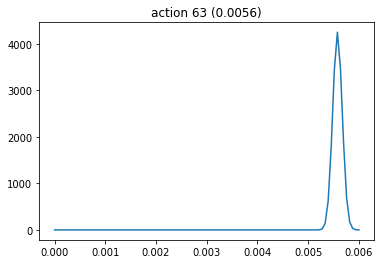

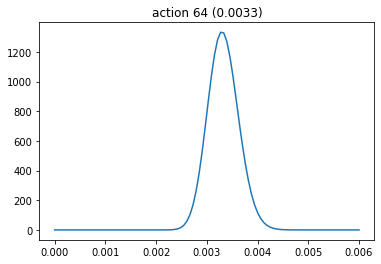

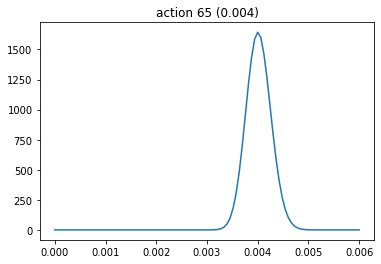

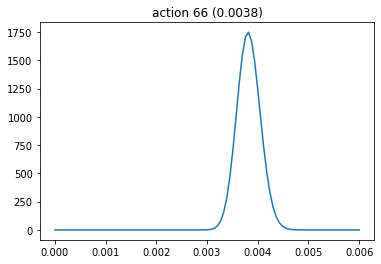

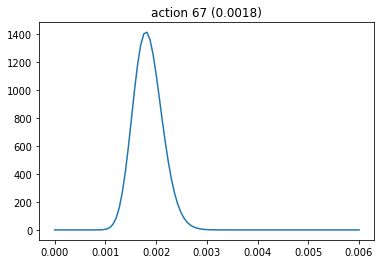

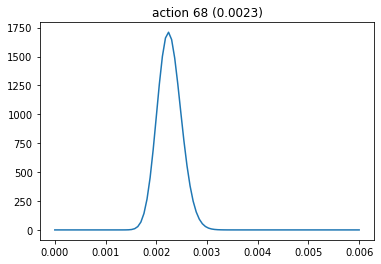

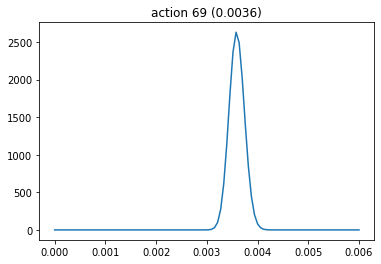

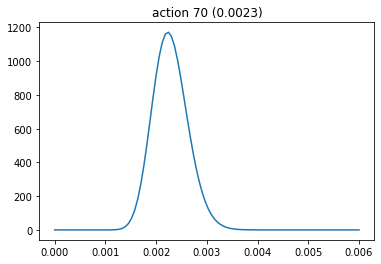

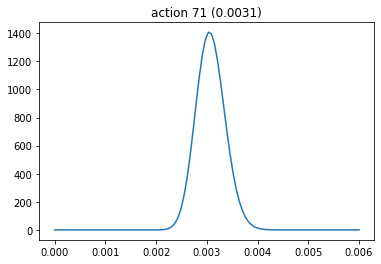

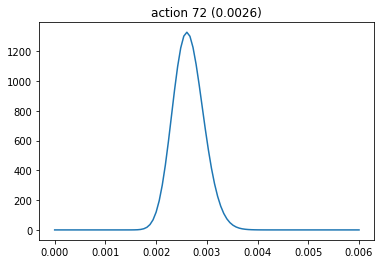

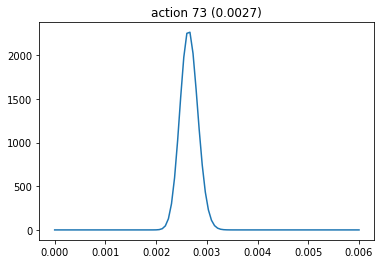

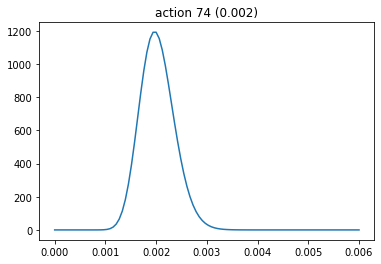

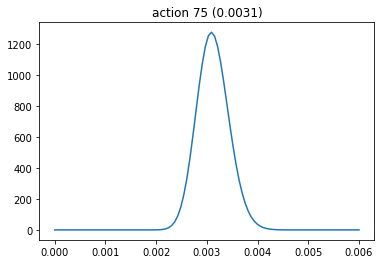

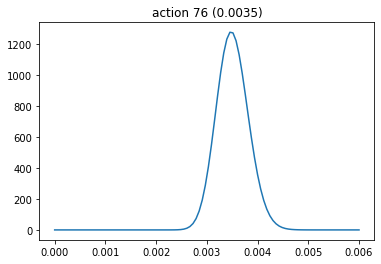

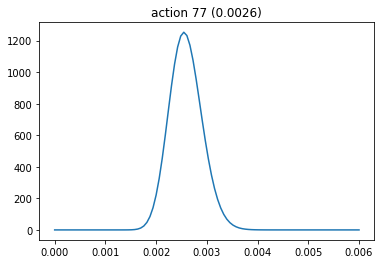

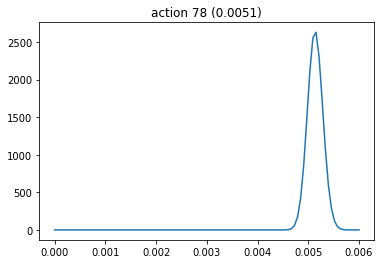

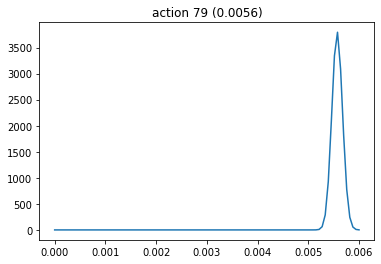

In [46]:
for i, mean in zip(range(dataset_bts.n_actions), Alpha / (Alpha + Beta)):
    plt.figure()
    x = np.linspace(0, 0.006, 100)
    y = beta.pdf(x, Alpha[i], Beta[i])
    plt.plot(x, y)
    plt.title('action {} ({})'.format(str(i), round(mean, 4)))
    plt.show()

In [47]:
# order of impression  vs  order of beta posterior mean 
impression_order = sorted(Counter(bandit_feedback_bts['action']).items(), key=lambda x:x[1], reverse=True)
beta_mean_order = np.argsort(Alpha / (Alpha + Beta))[::-1]

for i, (action1, action2) in enumerate(zip(impression_order, beta_mean_order), 1):
    print('order{}: '.format(i), action1[0], '({})'.format(action1[1]), action2) 
    if i%10==0:
        print('------------------------')

order1:  51 (1351176) 61
order2:  39 (963496) 49
order3:  7 (921749) 51
order4:  61 (855424) 63
order5:  59 (776588) 79
order6:  63 (586567) 35
order7:  49 (486996) 59
order8:  35 (462120) 47
order9:  79 (450993) 41
order10:  41 (446202) 34
------------------------
order11:  58 (387565) 39
order12:  47 (356582) 7
order13:  60 (277431) 78
order14:  18 (262335) 45
order15:  34 (247440) 58
order16:  78 (208860) 52
order17:  45 (200245) 43
order18:  0 (178370) 60
order19:  28 (173418) 62
order20:  43 (163239) 48
------------------------
order21:  52 (155897) 38
order22:  69 (147231) 30
order23:  38 (140744) 31
order24:  62 (119397) 65
order25:  48 (101863) 18
order26:  11 (91817) 46
order27:  22 (85597) 28
order28:  73 (79988) 66
order29:  46 (77572) 55
order30:  66 (62125) 57
------------------------
order31:  30 (62057) 8
order32:  42 (61921) 32
order33:  15 (59560) 69
order34:  8 (59294) 42
order35:  50 (57606) 37
order36:  57 (56083) 76
order37:  65 (56037) 11
order38:  14 (55563) 17
o

#### Distribution over actions
* the true action choie probabilities by MonteCarlo simulations   
  based on the policy parameters(parameters of the beta prior distribution used by Bernoulli-TS)
  
* this is used to calculate importance weight 

In [48]:
# obp code 
policy = BernoulliTS(
    n_actions=dataset_bts.n_actions, 
    len_list=dataset_bts.len_list, 
    is_zozotown_prior=True, # replicate the policy parameters of BernoulliTS policy in the ZOZOTOWN production
    campaign="all",
    random_state=12345,
)
action_dist = policy.compute_batch_action_dist(n_sim=100000, n_rounds=1)

In [49]:
print(action_dist.shape) # (n_rounds, n_actions, len_list)
action_dist

(1, 80, 3)


array([[[1.0780e-02, 9.3100e-03, 9.1700e-03],
        [1.6700e-03, 7.7000e-04, 7.6000e-04],
        [5.8000e-03, 6.1400e-03, 6.3100e-03],
        [4.6000e-04, 1.3000e-03, 1.8500e-03],
        [3.5000e-04, 1.5000e-04, 1.1000e-04],
        [8.4200e-03, 4.7400e-03, 3.7500e-03],
        [2.5500e-03, 1.2500e-03, 1.0700e-03],
        [7.6600e-03, 2.5010e-02, 5.1250e-02],
        [4.2100e-03, 2.4100e-03, 1.9100e-03],
        [7.0200e-03, 4.0700e-03, 3.3100e-03],
        [1.0000e-03, 5.9000e-04, 4.7000e-04],
        [3.5400e-03, 5.6400e-03, 7.0600e-03],
        [2.8600e-03, 3.3800e-03, 3.0900e-03],
        [4.8900e-03, 3.5500e-03, 3.2000e-03],
        [5.0100e-03, 5.8200e-03, 6.5900e-03],
        [3.5000e-04, 4.4000e-04, 7.4000e-04],
        [2.3000e-04, 1.7000e-04, 1.4000e-04],
        [8.0000e-05, 9.0000e-05, 1.2000e-04],
        [8.9400e-03, 2.4790e-02, 4.1520e-02],
        [4.3300e-03, 3.9100e-03, 3.1900e-03],
        [1.3100e-03, 6.7000e-04, 4.3000e-04],
        [2.0500e-03, 9.0000e-04, 6

In [50]:
# simulation code 
n_rounds = 1 # dataset_bts.n_rounds
n_actions = dataset_bts.n_actions 
len_list = dataset_bts.len_list
action_count = np.zeros((n_actions, len_list), dtype = int) # (80, 3)

n_sim = 100000
random_state = 12345
random_ = check_random_state(random_state)

for _ in np.arange(n_sim):
    
    # select action 
    predicted_rewards = random_.beta(a = alpha_ , b = beta_ )   
    selected_actions = predicted_rewards.argsort()[::-1][: len_list] 
    
    # count selected action  
    for pos in np.arange(len_list):
        action_count[selected_actions[pos], pos] += 1
    
action_dist = np.tile(action_count / n_sim, (n_rounds, 1, 1))

In [51]:
action_count

array([[ 1078,   931,   917],
       [  167,    77,    76],
       [  580,   614,   631],
       [   46,   130,   185],
       [   35,    15,    11],
       [  842,   474,   375],
       [  255,   125,   107],
       [  766,  2501,  5125],
       [  421,   241,   191],
       [  702,   407,   331],
       [  100,    59,    47],
       [  354,   564,   706],
       [  286,   338,   309],
       [  489,   355,   320],
       [  501,   582,   659],
       [   35,    44,    74],
       [   23,    17,    14],
       [    8,     9,    12],
       [  894,  2479,  4152],
       [  433,   391,   319],
       [  131,    67,    43],
       [  205,    90,    64],
       [  236,   161,   198],
       [ 2785,  1041,   698],
       [  648,   341,   278],
       [   50,    51,    39],
       [ 2047,   855,   622],
       [ 2820,  1373,  1058],
       [ 2428,  2853,  2968],
       [   85,    56,    66],
       [   54,    48,    32],
       [  176,   103,    92],
       [  644,   350,   289],
       [  

In [52]:
action_dist

array([[[1.0780e-02, 9.3100e-03, 9.1700e-03],
        [1.6700e-03, 7.7000e-04, 7.6000e-04],
        [5.8000e-03, 6.1400e-03, 6.3100e-03],
        [4.6000e-04, 1.3000e-03, 1.8500e-03],
        [3.5000e-04, 1.5000e-04, 1.1000e-04],
        [8.4200e-03, 4.7400e-03, 3.7500e-03],
        [2.5500e-03, 1.2500e-03, 1.0700e-03],
        [7.6600e-03, 2.5010e-02, 5.1250e-02],
        [4.2100e-03, 2.4100e-03, 1.9100e-03],
        [7.0200e-03, 4.0700e-03, 3.3100e-03],
        [1.0000e-03, 5.9000e-04, 4.7000e-04],
        [3.5400e-03, 5.6400e-03, 7.0600e-03],
        [2.8600e-03, 3.3800e-03, 3.0900e-03],
        [4.8900e-03, 3.5500e-03, 3.2000e-03],
        [5.0100e-03, 5.8200e-03, 6.5900e-03],
        [3.5000e-04, 4.4000e-04, 7.4000e-04],
        [2.3000e-04, 1.7000e-04, 1.4000e-04],
        [8.0000e-05, 9.0000e-05, 1.2000e-04],
        [8.9400e-03, 2.4790e-02, 4.1520e-02],
        [4.3300e-03, 3.9100e-03, 3.1900e-03],
        [1.3100e-03, 6.7000e-04, 4.3000e-04],
        [2.0500e-03, 9.0000e-04, 6